In [ ]:
'''This program attempts to optimize a users portfolio using the Efficient Frontier'''

'This program attempts to optimize a users portfolio using the Efficient Frontier'

In [ ]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock tickers in the portfolio 
assets = ['AMD','NFLX','AAPL','GOOG']

In [ ]:
#Assign weights to the stocks. 
weights = np.array([0.25,0.25,0.25,0.25])

In [ ]:
# Get the stock/ portfolio starting date
stockStartDate = '2015-01-01'

In [ ]:
# Get the stocks' ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-02-15'

In [ ]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted close price of the sock into the df
for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Adj Close']

In [ ]:
# show df
df

,AMD,NFLX,AAPL,GOOG
Date,,,,
2015-01-02,2.670000,49.848572,24.861401,523.373108
2015-01-05,2.660000,47.311428,24.161013,512.463013
2015-01-06,2.630000,46.501431,24.163294,500.585632
2015-01-07,2.580000,46.742859,24.502111,499.727997
2015-01-08,2.610000,47.779999,25.443539,501.303680
...,...,...,...,...
2021-02-08,91.470001,547.919983,136.910004,2092.909912
2021-02-09,90.910004,559.070007,136.009995,2083.510010
2021-02-10,92.349998,563.590027,135.389999,2095.379883


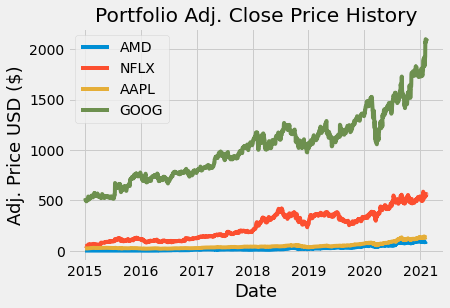

In [ ]:
# Visually show the stock/ portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [ ]:
# show the daily simple return
returns = df.pct_change()
returns

,AMD,NFLX,AAPL,GOOG
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.003745,-0.050897,-0.028172,-0.020846
2015-01-06,-0.011278,-0.017121,0.000094,-0.023177
2015-01-07,-0.019011,0.005192,0.014022,-0.001713
2015-01-08,0.011628,0.022188,0.038422,0.003153
...,...,...,...,...
2021-02-08,0.040614,-0.005211,0.001097,-0.002426
2021-02-09,-0.006122,0.020350,-0.006574,-0.004491
2021-02-10,0.015840,0.008085,-0.004558,0.005697


In [ ]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,AMD,NFLX,AAPL,GOOG
AMD,0.400264,0.079733,0.069470,0.052329
NFLX,0.079733,0.183637,0.052318,0.055783
AAPL,0.069470,0.052318,0.088055,0.048199
GOOG,0.052329,0.055783,0.048199,0.073669


In [ ]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.09133050611264201

In [ ]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.3022093746273302

In [ ]:
# Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.46236210081686907

In [ ]:
# Sow the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expected annual return: 46.0%
Annual volatility/ risk: 30.0%
Annual variance: 9.0%


In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.31085), ('NFLX', 0.33717), ('AAPL', 0.29553), ('GOOG', 0.05646)])
Expected annual return: 51.8%
Annual volatility: 33.6%
Sharpe Ratio: 1.48


(0.5181620082441062, 0.3360787917959159, 1.4822774313786973)

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 50000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AMD': 166, 'NFLX': 31, 'AAPL': 110, 'GOOG': 1}
Funds remaining: $187.25


OrderedDict([('AMD', 0.31085), ('NFLX', 0.33717), ('AAPL', 0.29553), ('GOOG', 0.05646)])
Expected annual return: 51.8%
Annual volatility: 33.6%
Sharpe Ratio: 1.48


(0.5181620082441062, 0.3360787917959159, 1.4822774313786973)

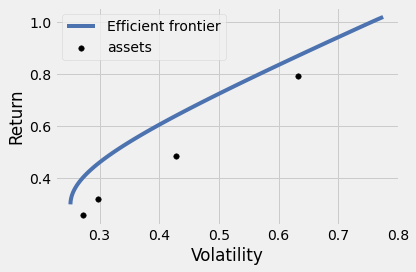

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
plotting.plot_efficient_frontier(ef)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)




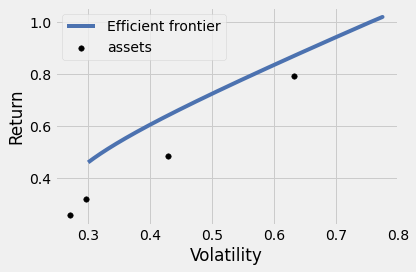

OrderedDict([('AMD', 0.31085), ('NFLX', 0.33717), ('AAPL', 0.29553), ('GOOG', 0.05646)])
Expected annual return: 51.8%
Annual volatility: 33.6%
Sharpe Ratio: 1.48


(0.5181620082441062, 0.3360787917959159, 1.4822774313786973)

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
# 100 portfolios with risks between 0.10 and 0.30
risk_range = np.linspace(0.30, 0.80, 1000)
plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,show_assets=True, showfig=True)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


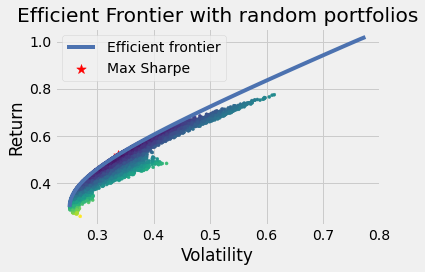

In [ ]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()